# 0.0 Imports 
 

In [ ]:
!pip install matplotlib --upgrade

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import math

import pandas as pd

from sklearn.decomposition import PCA
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

import sys

import numpy as np

import seaborn as sns

from matplotlib import pyplot as plt

In [ ]:
# Caminho do arquivo no drive de Matheus
df_raw = pd.read_csv('/content/drive/MyDrive/Dataset_SI/Fraud.csv')

# 1.0 Descriçao dos dados

In [ ]:
df_raw.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## 1.1 Check Nan

In [ ]:
df_raw.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## 1.2 Data types

In [ ]:
df_raw

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
df_raw.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

## 1.3 Descriptive statistical

In [ ]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


# 2.0 Feature engineering

In [ ]:
df_raw['real_hour'] = round(df_raw['step']%24)

In [ ]:
df_raw

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,real_hour
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,1
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,23
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,23
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,23
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,23


# 3.0 Analise Exploratoria dos Dados

## 3.1 Univariate Analysis

### 3.1.1 Numerical Variable

In [ ]:
num_attributes = df_raw.select_dtypes( include=['int64', 'float64'] )

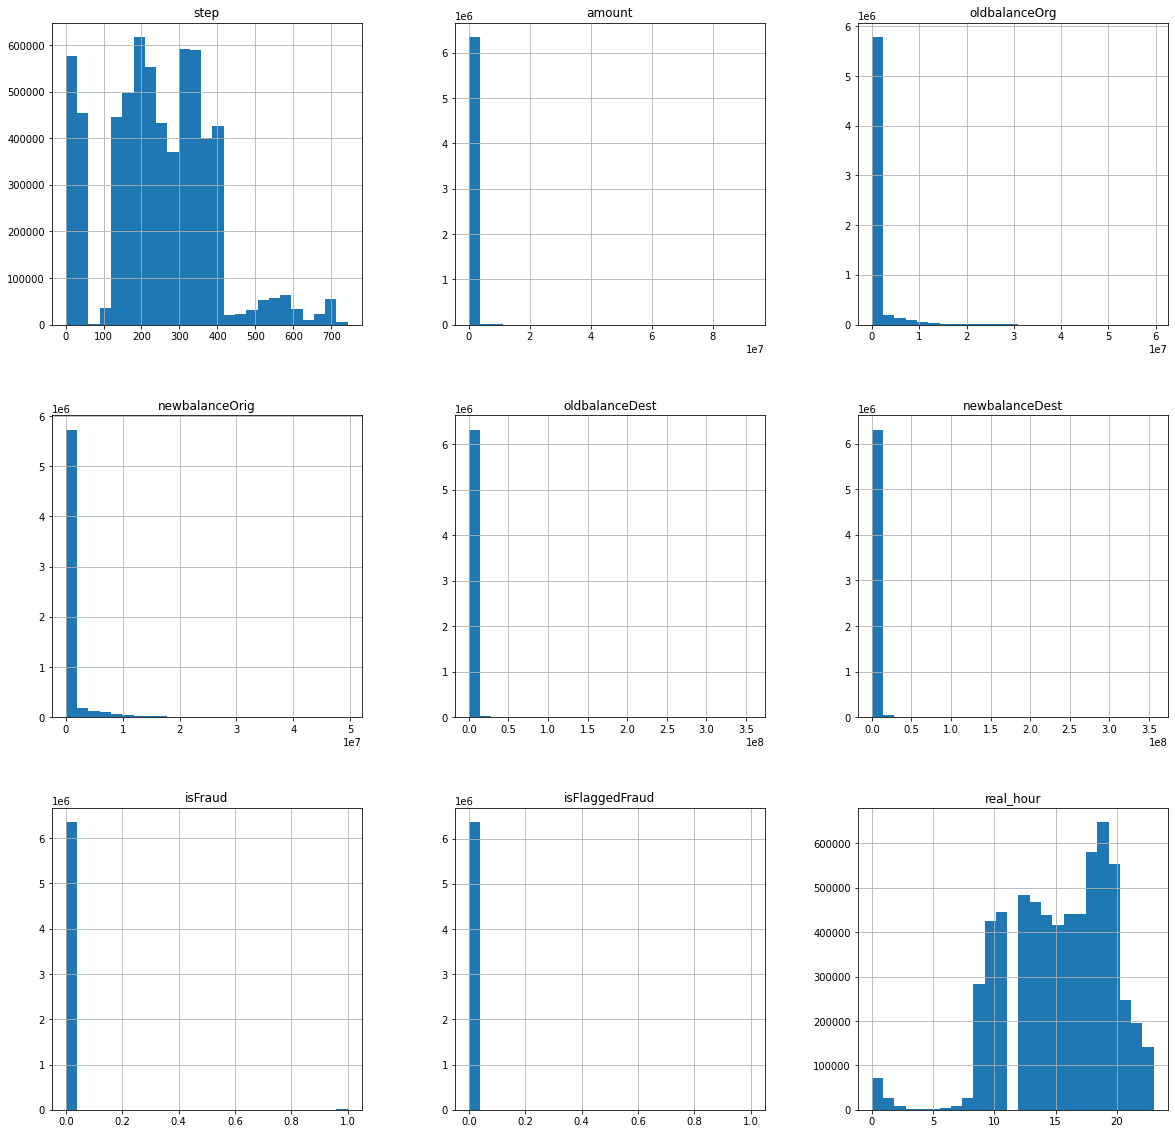

In [ ]:
num_attributes.hist(bins=25, figsize=( 20, 20 ));

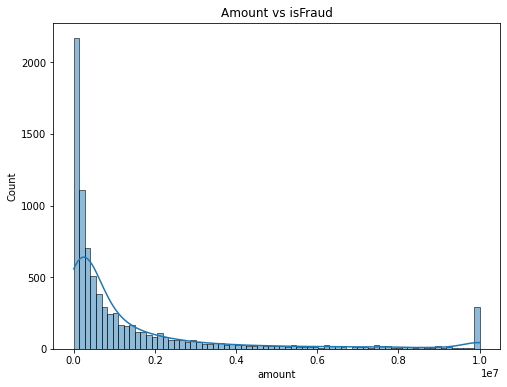

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=df_raw[df_raw['isFraud']==1],x='amount',kde=True)
plt.title('Amount vs isFraud')
plt.show()

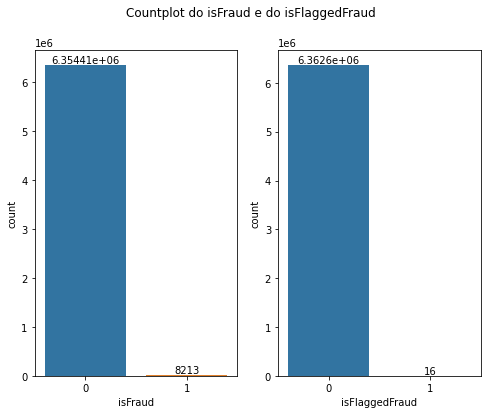

In [ ]:
plt.figure(figsize=(8,6))

plt.subplot(121)
ax = sns.countplot(data=df_raw,x='isFraud')
ax.bar_label(container=ax.containers[0])

plt.subplot(122)
ax = sns.countplot(data=df_raw,x='isFlaggedFraud')
ax.bar_label(container=ax.containers[0])

plt.suptitle('Countplot do isFraud e do isFlaggedFraud')
plt.show()

O número de ocorrências de 'isFlaggedFraud' sendo 1 é muito pequeno, o que indica que podemos retirá-lo do dataset.

### 3.1.2 Categorical Variable

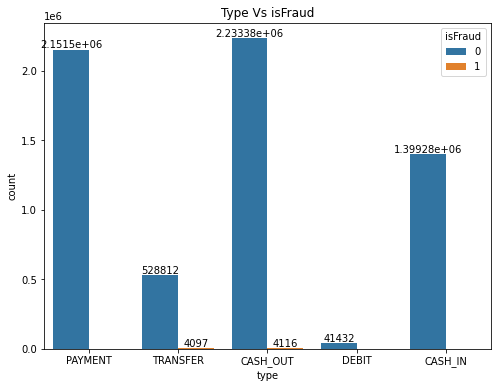

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df_raw,x='type',hue='isFraud')
for i in range(len(ax.containers)):
    ax.bar_label(container=ax.containers[i])
plt.title('Type Vs isFraud')
plt.show()

In [ ]:
isFraudEq1 = df_raw["isFraud"] == 1
fraudsDistribution = df_raw[isFraudEq1]['type'].value_counts(normalize = True)
print("Proporção de fraudes de acordo com o tipo de transação:")
print(fraudsDistribution,"\n")
print("Proporção dos tipos de transações:")
print(df_raw['type'].value_counts(normalize = True))

Proporção de fraudes de acordo com o tipo de transação:
CASH_OUT    0.501157
TRANSFER    0.498843
Name: type, dtype: float64 

Proporção dos tipos de transações:
CASH_OUT    0.351663
PAYMENT     0.338146
CASH_IN     0.219923
TRANSFER    0.083756
DEBIT       0.006512
Name: type, dtype: float64


Quase metade das transações fraudulentas são do tipo 'TRANSFER', mesmo esse tipo representando apenas cerca de 8% de todas as transações.

## 3.2 Multivariate Analysis

<AxesSubplot:>

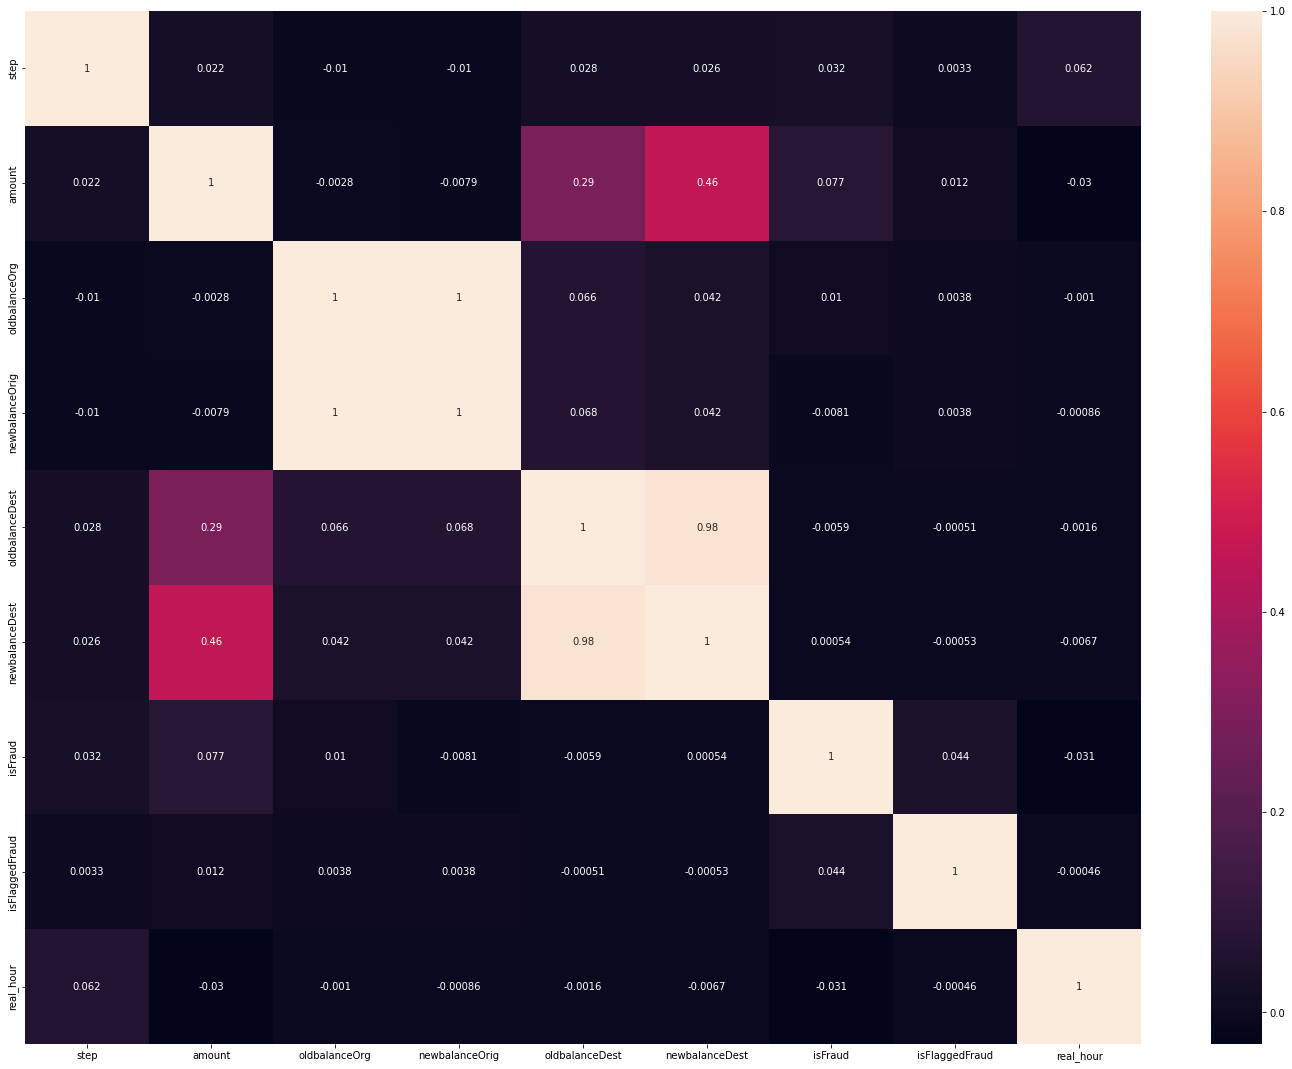

In [ ]:
corr = df_raw.corr(method='pearson')
plt.figure( figsize=( 25, 19 ) )
sns.heatmap(corr, annot=True)

# 5.0 Data Preparation

##5.1 Drop irrelevant columns

* Target class is 'isFraud' and rest of the columns are features
* Will drop 'nameOrig' and 'nameDest' as we can not make any relationship with fraud and names
* 'type' column to be converted to numeric for processing
* 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest; and 'newbalanceDest' to be normalized for speedy convergence

Removendo também o 'step', que foi substituido pelo real_hour, e o 'isFlaggedFraud', que possui poucos casos.

In [ ]:
df_dropped = df_raw.drop(columns=['nameOrig', 'nameDest', 'step', 'isFlaggedFraud'])

## 5.2 Encoding

In [ ]:
df_dropped.dtypes

type               object
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
real_hour           int64
dtype: object

In [ ]:
le = LabelEncoder()

In [ ]:
df_dropped['type'] = le.fit_transform(df_dropped['type'] )

In [ ]:
df_dropped.dtypes

type                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
real_hour           int64
dtype: object

## 5.3 Split dataframe into training and test dataset

In [ ]:
X = df_dropped.drop("isFraud", axis=1)
y = df_dropped['isFraud']

In [ ]:
SEED = 123456

df_dropped_train, df_dropped_test = train_test_split(df_dropped, 
                                                    test_size = 0.50, 
                                                    random_state = SEED, 
                                                    stratify=y)

In [ ]:
df_dropped_train['isFraud'].mean(), df_dropped_test['isFraud'].mean()

(0.001290663280221041, 0.0012909776161392633)

In [ ]:
X_dropped_test = df_dropped_test.drop("isFraud", axis=1)
y_dropped_test = df_dropped_test["isFraud"]

In [ ]:
X_dropped_test_scaled = preprocessing.maxabs_scale(X_dropped_test)

In [ ]:
isFraud0Indexes = df_dropped_train[df_dropped_train.isFraud == 0].index
isFraud1Indexes = df_dropped_train[df_dropped_train.isFraud == 1].index
sampleSize = sum(df_dropped_train.isFraud == 1)
isFraudListSamples = []
isFraudListProportions = []
for i in range(1, 375, 30):
  randomIndexes = np.random.choice(isFraud0Indexes, sampleSize*i, replace=False)
  concatenatedIndexes = np.concatenate([isFraud1Indexes, randomIndexes])
  isFraudListSamples.append(df_dropped_train.loc[concatenatedIndexes])
  isFraudListProportions.append(i)
  
randomIndexesBalanced = np.random.choice(isFraud0Indexes, sampleSize, replace=False)
balancedIndexes = np.concatenate([isFraud1Indexes, randomIndexesBalanced])
isFraudBalancedSample = df_dropped_train.loc[balancedIndexes]

In [ ]:
X_balanced = isFraudBalancedSample.drop("isFraud", axis=1)
y_balanced = isFraudBalancedSample['isFraud']

In [ ]:
SEED = 123456

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.99, 
                                                    random_state = SEED, 
                                                    stratify=y)

In [ ]:
y_train.mean(), y_test.mean()

(0.0012887813158142898, 0.0012908410454113785)

In [ ]:
print("Proporção no dataset de treino desbalanceado:")
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))
print("\nProporção no dataset de treino balanceado:")
print(y_balanced.value_counts())
print(y_balanced.value_counts(normalize=True))
print("\nProporção no dataset de teste:")
print(y_test.value_counts())
print(y_train.value_counts(normalize=True))

Proporção no dataset de treino desbalanceado:
0    63544
1       82
Name: isFraud, dtype: int64
0    0.998711
1    0.001289
Name: isFraud, dtype: float64

Proporção no dataset de treino balanceado:
1    4106
0    4106
Name: isFraud, dtype: int64
1    0.5
0    0.5
Name: isFraud, dtype: float64

Proporção no dataset de teste:
0    6290863
1       8131
Name: isFraud, dtype: int64
0    0.998711
1    0.001289
Name: isFraud, dtype: float64


É possível ver que a proporção permaneceu a mesma.

## 5.4 Scaling the features

Feito separadamente para evidar data leak.

In [ ]:
X_balanced_scaled = preprocessing.maxabs_scale(X_balanced)
X_train_scaled = preprocessing.maxabs_scale(X_train)
X_test_scaled = preprocessing.maxabs_scale(X_test)

## 5.5 Converting to ndarray

In [ ]:
y_balanced_ndarray = y_balanced.to_numpy()
y_train_ndarray = y_train.to_numpy()
y_test_ndarray = y_test.to_numpy()

# 6.0 Feature Selection


Optamos por não usar um algoritmo de seleção de features ja que existem poucas em nosso conjunto de dados.

# 7.0 ML models 

## 7.1 Naive Bayes (Baseline model)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63626 entries, 4670980 to 1134446
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            63626 non-null  int64  
 1   amount          63626 non-null  float64
 2   oldbalanceOrg   63626 non-null  float64
 3   newbalanceOrig  63626 non-null  float64
 4   oldbalanceDest  63626 non-null  float64
 5   newbalanceDest  63626 non-null  float64
 6   real_hour       63626 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 3.9 MB


In [ ]:
# model
nb = GaussianNB().fit(X_train_scaled, y_train)

# prediction
yhat_nb = nb.predict( X_test_scaled )

# performance
cr_nb = classification_report(y_test, yhat_nb)
print(cr_nb)
print("Score no dataset de treino:",nb.score(X_train_scaled, y_train))
print("Score no dataset de teste:",nb.score(X_test_scaled, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   6290863
           1       0.18      0.08      0.11      8131

    accuracy                           1.00   6298994
   macro avg       0.59      0.54      0.55   6298994
weighted avg       1.00      1.00      1.00   6298994

Score no dataset de treino: 0.99548926539465
Score no dataset de teste: 0.9983376710630301


<AxesSubplot:>

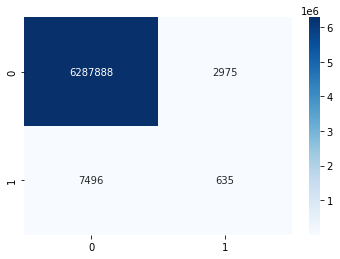

In [ ]:
cm_nb = metrics.confusion_matrix(y_test, yhat_nb)
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='d')

In [ ]:
# model
balanced_nb = GaussianNB().fit(X_balanced_scaled, y_balanced)

# prediction
balanced_yhat_nb = balanced_nb.predict( X_test_scaled )

# performance
cr_balanced_nb = classification_report(y_test, balanced_yhat_nb)
print(cr_balanced_nb)
print("Score no dataset de treino:",balanced_nb.score(X_balanced_scaled, y_balanced))
print("Score no dataset de teste:",balanced_nb.score(X_test_scaled, y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98   6290863
           1       0.02      0.46      0.04      8131

    accuracy                           0.97   6298994
   macro avg       0.51      0.71      0.51   6298994
weighted avg       1.00      0.97      0.98   6298994

Score no dataset de treino: 0.77496346809547
Score no dataset de teste: 0.9675805374636013


<AxesSubplot:>

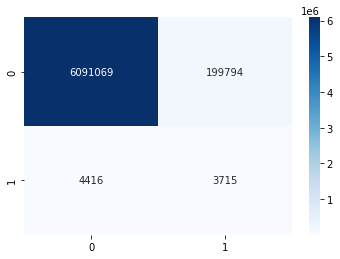

In [ ]:
cm_balanced_nb = metrics.confusion_matrix(y_test, balanced_yhat_nb)
sns.heatmap(cm_balanced_nb, annot=True, cmap='Blues', fmt='d')

### Cross-validation


In [ ]:
nb_samples_precision = []
nb_samples_recall = []
for df_sample in isFraudListSamples:
  X_sample = df_sample.drop("isFraud", axis=1)
  y_sample = df_sample['isFraud']

  X_sample_scaled = preprocessing.maxabs_scale(X_sample)
  # model
  sample_nb = GaussianNB().fit(X_sample_scaled, y_sample)

  # prediction
  sample_yhat_nb = sample_nb.predict( X_dropped_test_scaled )

  # performance
  precision = precision_score(y_dropped_test, sample_yhat_nb, average='binary')
  recall = recall_score(y_dropped_test, sample_yhat_nb, average='binary')
  nb_samples_precision.append(precision)
  nb_samples_recall.append(recall)

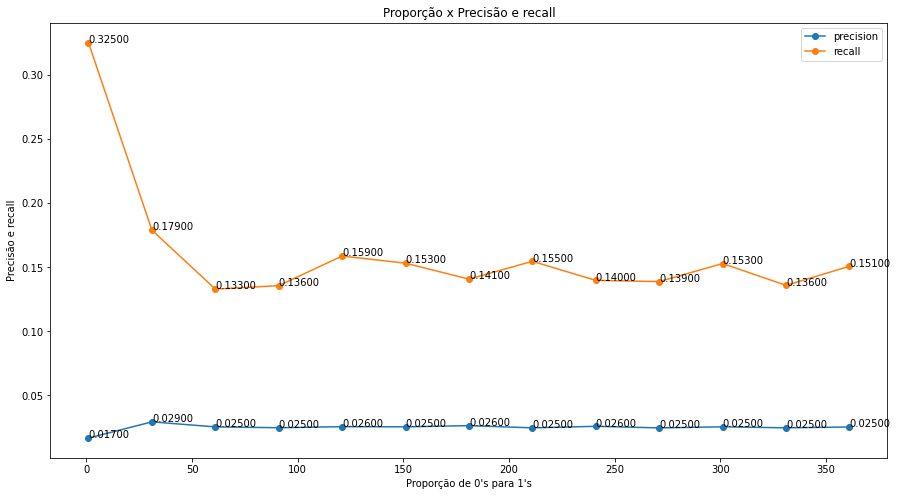

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_xlabel("Proporção de 0's para 1's")
ax.set_ylabel("Precisão e recall")
ax.set_title("Proporção x Precisão e recall")
ax.plot(isFraudListProportions, nb_samples_precision, marker='o', label="precision")
ax.plot(isFraudListProportions, nb_samples_recall, marker='o', label="recall")
for f, t, v in zip(isFraudListProportions, nb_samples_precision, nb_samples_recall):
      plt.text(f, t, "%.5f" % round(t,3))
      plt.text(f, v, "%.5f" % round(v,3))
ax.legend()
plt.show()

## 7.2 RandomForestClassifier


In [ ]:
# model
rf = RandomForestClassifier( n_estimators=10, n_jobs=-1, random_state=42 ).fit( X_train_scaled, y_train )

# prediction
yhat_rf = rf.predict( X_test_scaled )

# performance
print(classification_report(y_test, yhat_rf))
print("Score no dataset de treino:",rf.score(X_train_scaled, y_train))
print("Score no dataset de teste:",rf.score(X_test_scaled, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   6290863
           1       0.99      0.56      0.71      8131

    accuracy                           1.00   6298994
   macro avg       1.00      0.78      0.86   6298994
weighted avg       1.00      1.00      1.00   6298994

Score no dataset de treino: 0.9999528494640556
Score no dataset de teste: 0.9994202248803539


<AxesSubplot:>

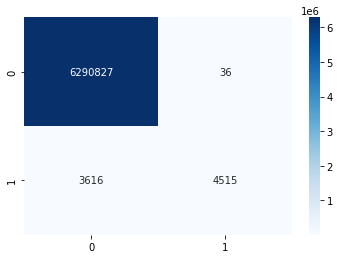

In [ ]:
cm_rf = metrics.confusion_matrix(y_test, yhat_rf)
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d')

In [ ]:
# model
balanced_rf = RandomForestClassifier( n_estimators=10, n_jobs=-1, random_state=42 ).fit(X_balanced_scaled, y_balanced)

# prediction
balanced_yhat_rf = balanced_rf.predict( X_test_scaled )

# performance
cr_balanced_rf = classification_report(y_test, balanced_yhat_rf)
print(cr_balanced_rf)
print("Score no dataset de treino:",balanced_rf.score(X_balanced_scaled, y_balanced))
print("Score no dataset de teste:",balanced_rf.score(X_test_scaled, y_test))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95   6290863
           1       0.01      0.97      0.03      8131

    accuracy                           0.91   6298994
   macro avg       0.51      0.94      0.49   6298994
weighted avg       1.00      0.91      0.95   6298994

Score no dataset de treino: 0.9987834549878345
Score no dataset de teste: 0.9119741977845987


<AxesSubplot:>

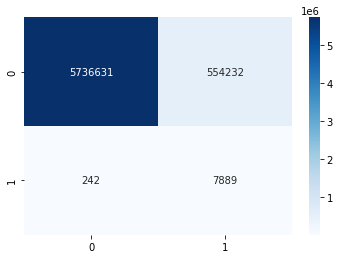

In [ ]:
cm_balanced_rf = metrics.confusion_matrix(y_test, balanced_yhat_rf)
sns.heatmap(cm_balanced_rf, annot=True, cmap='Blues', fmt='d')

### Cross-validation

In [ ]:
rf_samples_precision = []
rf_samples_recall = []
for df_sample in isFraudListSamples:
  X_sample = df_sample.drop("isFraud", axis=1)
  y_sample = df_sample['isFraud']

  X_sample_scaled = preprocessing.maxabs_scale(X_sample)
  # model
  sample_rf = RandomForestClassifier( n_estimators=20, n_jobs=-1 ).fit(X_sample_scaled, y_sample)

  # prediction
  sample_yhat_rf = sample_rf.predict( X_dropped_test_scaled )

  # performance
  precision = precision_score(y_dropped_test, sample_yhat_rf, average='binary')
  recall = recall_score(y_dropped_test, sample_yhat_rf, average='binary')
  rf_samples_precision.append(precision)
  rf_samples_recall.append(recall)

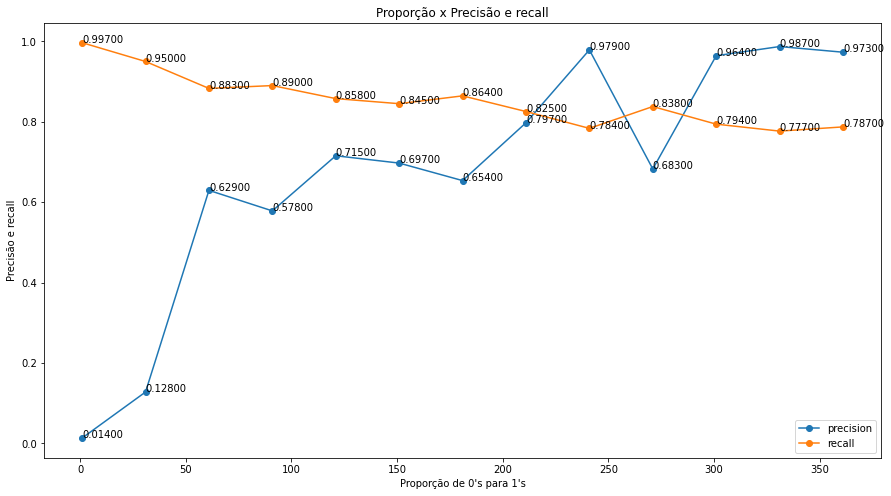

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_xlabel("Proporção de 0's para 1's")
ax.set_ylabel("Precisão e recall")
ax.set_title("Proporção x Precisão e recall")
ax.plot(isFraudListProportions, rf_samples_precision, marker='o', label="precision")
ax.plot(isFraudListProportions, rf_samples_recall, marker='o', label="recall")
for f, t, v in zip(isFraudListProportions, rf_samples_precision, rf_samples_recall):
      plt.text(f, t, "%.5f" % round(t,3))
      plt.text(f, v, "%.5f" % round(v,3))
ax.legend()
plt.show()

## 7.3 Multi-layer perceptron

In [ ]:
# model
mlp = MLPClassifier(random_state = SEED)
mlp.fit(X_train_scaled, y_train)

# prediction
yhat_mlp = mlp.predict( X_test_scaled )

# performance
print(classification_report(y_test, yhat_mlp))
print("Score no dataset de treino:",mlp.score(X_train_scaled, y_train))
print("Score no dataset de teste:",mlp.score(X_test_scaled, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   6290863
           1       0.99      0.03      0.06      8131

    accuracy                           1.00   6298994
   macro avg       1.00      0.51      0.53   6298994
weighted avg       1.00      1.00      1.00   6298994

Score no dataset de treino: 0.9988369534467042
Score no dataset de teste: 0.9987455139661984


<AxesSubplot:>

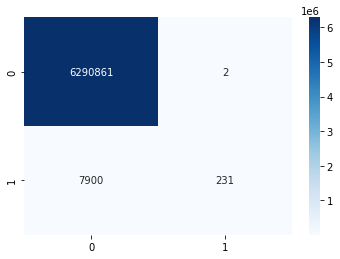

In [ ]:
cm_mlp = metrics.confusion_matrix(y_test, yhat_mlp)
sns.heatmap(cm_mlp, annot=True, cmap='Blues', fmt='d')

In [ ]:
# model
balanced_mlp = MLPClassifier(random_state = SEED)
balanced_mlp.fit(X_balanced_scaled, y_balanced)

# prediction
balanced_yhat_mlp = balanced_mlp.predict( X_test_scaled )

# performance
cr_balanced_mlp = classification_report(y_test, balanced_yhat_mlp)
print(cr_balanced_mlp)
print("Score no dataset de treino:",balanced_mlp.score(X_balanced_scaled, y_balanced))
print("Score no dataset de teste:",balanced_mlp.score(X_test_scaled, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


              precision    recall  f1-score   support

           0       1.00      0.93      0.96   6290863
           1       0.01      0.59      0.02      8131

    accuracy                           0.93   6298994
   macro avg       0.51      0.76      0.49   6298994
weighted avg       1.00      0.93      0.96   6298994

Score no dataset de treino: 0.8333333333333334
Score no dataset de teste: 0.931624954714991


<AxesSubplot:>

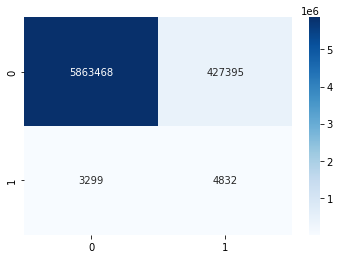

In [ ]:
cm_balanced_mlp = metrics.confusion_matrix(y_test, balanced_yhat_mlp)
sns.heatmap(cm_balanced_mlp, annot=True, cmap='Blues', fmt='d')

###Cross-validation

In [ ]:
mlp_samples_precision = []
mlp_samples_recall = []
for df_sample in isFraudListSamples:
  X_sample = df_sample.drop("isFraud", axis=1)
  y_sample = df_sample['isFraud']

  X_sample_scaled = preprocessing.maxabs_scale(X_sample)
  # model
  sample_mlp = MLPClassifier(random_state = SEED, max_iter=400).fit(X_sample_scaled, y_sample)
  sample_mlp.fit(X_sample_scaled, y_sample)

  # prediction
  sample_yhat_mlp = sample_mlp.predict( X_dropped_test_scaled )

  # performance
  precision = precision_score(y_dropped_test, sample_yhat_mlp, average='binary')
  recall = recall_score(y_dropped_test, sample_yhat_mlp, average='binary')
  mlp_samples_precision.append(precision)
  mlp_samples_recall.append(recall)

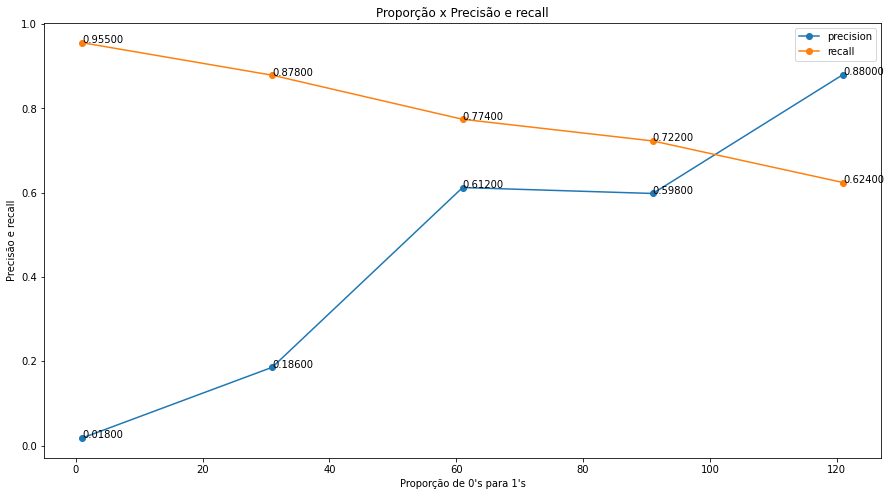

In [ ]:
isFraudListProportions5 = isFraudListProportions[:5]
fig, ax = plt.subplots(figsize=(15,8))
ax.set_xlabel("Proporção de 0's para 1's")
ax.set_ylabel("Precisão e recall")
ax.set_title("Proporção x Precisão e recall")
ax.plot(isFraudListProportions5, mlp_samples_precision, marker='o', label="precision")
ax.plot(isFraudListProportions5, mlp_samples_recall, marker='o', label="recall")
for f, t, v in zip(isFraudListProportions5, mlp_samples_precision, mlp_samples_recall):
      plt.text(f, t, "%.5f" % round(t,3))
      plt.text(f, v, "%.5f" % round(v,3))
ax.legend()
plt.show()